In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import os

In [0]:
print(os.getcwd())

/content


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


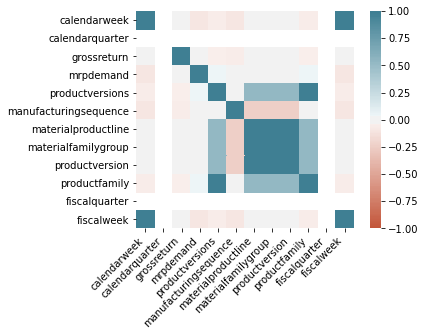

In [0]:

# Step 0 - Read the dataset, calculate column correlations and make a seaborn heatmap

data = pd.read_csv('/content/drive/My Drive/Capstone project/Updated_MRPdemand_Wks_01-08v1.csv')

corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [0]:
shopper=pd.read_csv('/content/drive/My Drive/Capstone project/Updated_MRPdemand_Wks_01-08v1.csv')
shopper

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,UniqueID,plant,materiallocation,productline,demandsource,region,backupdate,calendarweek,calendarquarter,grossreturn,baseunit,Quantity,mrpdemand,MatchorMismatch,partgroup,productid,productversions,manufacturingsequence,materialproductline,materialfamilygroup,producttype,procurementtype,materialtype,productversion,productfamily,psitype,fiscalquarter,fiscalweek
0,A_003-0044-01_202101,A,003-0044-01,2.5e+15,RV,E1,4/3/2020 0:00,202006,0,0,EA,0,1,Mismatch,CABLES POWER,POWER,25000220.0,9777.0,2.500000e+15,250.0,CABLES,X,ZSTK,25000030.0,250.0,SOLUTION,20211,202101
1,A_003-0045-01_202101,A,003-0044-01,2.5e+15,RV,D,4/3/2020 0:00,202006,0,0,EA,0,1,Mismatch,CABLES POWER,POWER,25000030.0,9777.0,2.500000e+15,250.0,CABLES,X,ZSTK,25000030.0,250.0,UPGRADE,20211,202101
2,A_003-0048-01_202101,A,003-0045-01,2.5e+15,RV,E1,4/3/2020 0:00,202006,0,0,EA,0,0,Mismatch,CABLES POWER,POWER,25000220.0,9777.0,2.500000e+15,250.0,CABLES,X,ZSTK,25000030.0,250.0,SOLUTION,20211,202101
3,A_003-0049-01_202101,A,003-0048-01,2.5e+15,DF,E1,4/3/2020 0:00,202006,0,0,EA,0,104,Mismatch,CABLES POWER,POWER,25000030.0,9777.0,2.500000e+15,250.0,CABLES,X,ZSTK,25000030.0,250.0,UPGRADE,20211,202101
4,A_003-0050-01_202101,A,003-0048-01,2.5e+15,DF,D,4/3/2020 0:00,202006,0,0,EA,0,104,Mismatch,CABLES POWER,POWER,25000030.0,9777.0,2.500000e+15,250.0,CABLES,X,ZSTK,25000030.0,250.0,UPGRADE,20211,202101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155279,M_106-652-004_202101,D,100-563-611,3.60E+15,CS,D,4/3/2020 0:00,202012,0,0,EA,166,2691,Mismatch,MODULE FILLER IO,FILLER IO,36000100.0,306.0,4.700000e+15,470.0,MODULE,X,ZSTK,47000010.0,360.0,SOLUTION,20211,202107
155280,M_106-652-005_202101,D,100-563-611,3.60E+15,RV,D,4/3/2020 0:00,202012,0,0,EA,166,2691,Mismatch,MODULE FILLER IO,FILLER IO,36000240.0,306.0,4.700000e+15,470.0,MODULE,X,ZSTK,47000010.0,360.0,UPGRADE,20211,202107
155281,M_106-652-011_202101,D,100-563-611,1.20E+15,RV,D,4/3/2020 0:00,202012,0,0,EA,166,2691,Mismatch,MODULE FILLER IO,FILLER IO,12000080.0,306.0,4.700000e+15,470.0,MODULE,X,ZSTK,47000010.0,120.0,UPGRADE,20211,202107
155282,M_106-652-013_202101,D,100-563-611,1.20E+15,UP,C1,4/3/2020 0:00,202012,0,0,EA,166,2691,Mismatch,MODULE FILLER IO,FILLER IO,12000030.0,306.0,4.700000e+15,470.0,MODULE,X,ZSTK,47000010.0,120.0,SOLUTION,20211,202107


In [0]:
shopper['grossreturn'].value_counts('0')

0.0      0.940302
1.0      0.029266
2.0      0.007896
3.0      0.004132
4.0      0.003030
           ...   
520.0    0.000003
188.0    0.000003
174.0    0.000003
289.0    0.000003
276.0    0.000003
Name: grossreturn, Length: 210, dtype: float64

In [0]:
# checking the head of the data

shopper.head(axis='grossreturn')

TypeError: ignored

In [0]:
# describing the data

shopper.describe()

,productline,calendarweek,calendarquarter,grossreturn,baselineavailableplan,productversion,manufacturingsequence,materialproductline,materialfamilygroup,productversion.1,productfamily,fiscalquarter,fiscalweek
count,3.474980e+05,347498.000000,347498.0,347498.000000,347498.000000,3.473530e+05,347491.000000,3.474910e+05,347491.000000,3.474910e+05,347353.000000,347498.000000,347498.000000
mean,5.256711e+15,202005.999977,0.0,0.490613,3.649319,5.258754e+07,6091.616603,4.288315e+15,428.829668,4.288315e+07,525.872671,20208.199923,202081.799452
std,3.417419e+15,1.414220,0.0,7.754165,44.407853,3.416623e+07,4295.749974,2.420839e+15,242.084512,2.420839e+07,341.663424,3.429306,24.750098
min,1.200008e+13,202004.000000,0.0,-13.000000,0.000000,1.000080e+06,0.000000,1.000080e+14,10.000000,1.000080e+06,10.000000,20204.000000,202051.000000
25%,3.500068e+15,202005.000000,0.0,0.000000,0.000000,3.500068e+07,1105.000000,3.400007e+15,340.000000,3.400007e+07,350.000000,20204.000000,202052.000000
50%,3.600008e+15,202006.000000,0.0,0.000000,0.000000,3.600008e+07,9444.000000,3.600010e+15,360.000000,3.600010e+07,360.000000,20211.000000,202101.000000
75%,8.900002e+15,202007.000000,0.0,0.000000,0.000000,8.900002e+07,9999.000000,4.700001e+15,470.000000,4.700001e+07,890.000000,20211.000000,202102.000000
max,1.240001e+16,202008.000000,0.0,695.000000,5331.000000,1.240001e+08,9999.000000,1.170000e+16,1170.000000,1.170000e+08,1240.000000,20211.000000,202103.000000


In [0]:
# checking the datatypes of the data

shopper.dtypes

UniqueID                   object
plant                    category
materiallocation           object
productline                object
demandsource               object
region                     object
backupdate                 object
calendarweek                int64
calendarquarter             int64
grossreturn                 int64
baseunit                   object
BookingsQuantity           object
mrpdemand                   int64
MatchorMismatch            object
partgroup                  object
productid                  object
productversions           float64
manufacturingsequence     float64
materialproductline       float64
materialfamilygroup       float64
producttype                object
procurementtype            object
materialtype               object
productversion            float64
productfamily             float64
psitype                    object
fiscalquarter               int64
fiscalweek                  int64
dtype: object

In [0]:
shopper11 = shopper.rename(columns = {"Unique ID":"UniqueID"}) 
  

shopper11

,Unique ID,plant,materiallocation,productline,demandsource,region,backupdate,calendarweek,calendarquarter,grossreturn,baseunit,Bookings Quantity,mrpdemand,Match or Mismatch,partgroup,productid,productversion,manufacturingsequence,materialproductline,materialfamilygroup,producttype,procurementtype,materialtype,productversion.1,productfamily,psitype,fiscalquarter,fiscalweek
0,A_003-0044-01_202101,A,003-0044-01,2.5e+15,RV,E1,4/3/2020 0:00,202006,0,0,EA,Null,1,Mismatch,CABLES POWER,POWER,25000220.0,9777.0,2.500000e+15,250.0,CABLES,X,ZSTK,25000030.0,250.0,SOLUTION,20211,202101
1,A_003-0045-01_202101,A,003-0044-01,2.5e+15,RV,D,4/3/2020 0:00,202006,0,0,EA,Null,1,Mismatch,CABLES POWER,POWER,25000030.0,9777.0,2.500000e+15,250.0,CABLES,X,ZSTK,25000030.0,250.0,UPGRADE,20211,202101
2,A_003-0048-01_202101,A,003-0045-01,2.5e+15,RV,E1,4/3/2020 0:00,202006,0,0,EA,Null,0,Mismatch,CABLES POWER,POWER,25000220.0,9777.0,2.500000e+15,250.0,CABLES,X,ZSTK,25000030.0,250.0,SOLUTION,20211,202101
3,A_003-0049-01_202101,A,003-0048-01,2.5e+15,DF,E1,4/3/2020 0:00,202006,0,0,EA,Null,104,Mismatch,CABLES POWER,POWER,25000030.0,9777.0,2.500000e+15,250.0,CABLES,X,ZSTK,25000030.0,250.0,UPGRADE,20211,202101
4,A_003-0050-01_202101,A,003-0048-01,2.5e+15,DF,D,4/3/2020 0:00,202006,0,0,EA,Null,104,Mismatch,CABLES POWER,POWER,25000030.0,9777.0,2.500000e+15,250.0,CABLES,X,ZSTK,25000030.0,250.0,UPGRADE,20211,202101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155279,M_106-652-004_202101,D,100-563-611,3.60E+15,CS,D,4/3/2020 0:00,202012,0,0,EA,166,2691,Mismatch,MODULE FILLER IO,FILLER IO,36000100.0,306.0,4.700000e+15,470.0,MODULE,X,ZSTK,47000010.0,360.0,SOLUTION,20211,202107
155280,M_106-652-005_202101,D,100-563-611,3.60E+15,RV,D,4/3/2020 0:00,202012,0,0,EA,166,2691,Mismatch,MODULE FILLER IO,FILLER IO,36000240.0,306.0,4.700000e+15,470.0,MODULE,X,ZSTK,47000010.0,360.0,UPGRADE,20211,202107
155281,M_106-652-011_202101,D,100-563-611,1.20E+15,RV,D,4/3/2020 0:00,202012,0,0,EA,166,2691,Mismatch,MODULE FILLER IO,FILLER IO,12000080.0,306.0,4.700000e+15,470.0,MODULE,X,ZSTK,47000010.0,120.0,UPGRADE,20211,202107
155282,M_106-652-013_202101,D,100-563-611,1.20E+15,UP,C1,4/3/2020 0:00,202012,0,0,EA,166,2691,Mismatch,MODULE FILLER IO,FILLER IO,12000030.0,306.0,4.700000e+15,470.0,MODULE,X,ZSTK,47000010.0,120.0,SOLUTION,20211,202107


In [0]:
for col in ['plant']:
  shopper[col] = shopper[col].astype('category')

In [0]:
for col in ['plant','demandsource','region','baseunit','MatchorMismatch','procurementtype','psitype']:
  shopper[col] = shopper[col].astype('category')

In [0]:
shopper.drop('')

In [0]:
for col in ['BookingsQuantity']:
  shopper[col] = shopper[col].astype('int')

KeyError: ignored

In [0]:
# taking out the information from the data

shopper.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155284 entries, 0 to 155283
Data columns (total 28 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   UniqueID               155284 non-null  object  
 1   plant                  155284 non-null  category
 2   materiallocation       155284 non-null  object  
 3   productline            155284 non-null  object  
 4   demandsource           155284 non-null  category
 5   region                 155284 non-null  category
 6   backupdate             155284 non-null  object  
 7   calendarweek           155284 non-null  int64   
 8   calendarquarter        155284 non-null  int64   
 9   grossreturn            155284 non-null  int64   
 10  baseunit               155284 non-null  category
 11  BookingsQuantity       155284 non-null  object  
 12  mrpdemand              155284 non-null  int64   
 13  MatchorMismatch        155284 non-null  category
 14  partgroup           

In [0]:
shopper1=shopper
shopper1.dtypes

UniqueID                   object
plant                    category
materiallocation         category
productline              category
demandsource             category
region                   category
backupdate               category
calendarweek                int64
calendarquarter             int64
grossreturn                 int64
baseunit                 category
BookingsQuantity           object
mrpdemand                   int64
MatchorMismatch          category
partgroup                category
productid                category
productversions           float64
manufacturingsequence     float64
materialproductline       float64
materialfamilygroup       float64
producttype              category
procurementtype          category
materialtype             category
productversion            float64
productfamily             float64
psitype                  category
fiscalquarter               int64
fiscalweek                  int64
dtype: object

In [0]:
# checking if the data contains any NULL values

shopper.isnull().sum()

Unique ID                    0
plant                        0
materiallocation             0
productline                  0
demandsource                 0
region                       0
backupdate                   0
calendarweek                 0
calendarquarter              0
grossreturn                  0
baseunit                     0
Bookings Quantity            0
mrpdemand                    0
Match or Mismatch            0
partgroup                  499
productid                22627
productversion             111
manufacturingsequence       21
materialproductline         21
materialfamilygroup         21
producttype                499
procurementtype             21
materialtype                21
productversion.1            21
productfamily              111
psitype                      0
fiscalquarter                0
fiscalweek                   0
dtype: int64

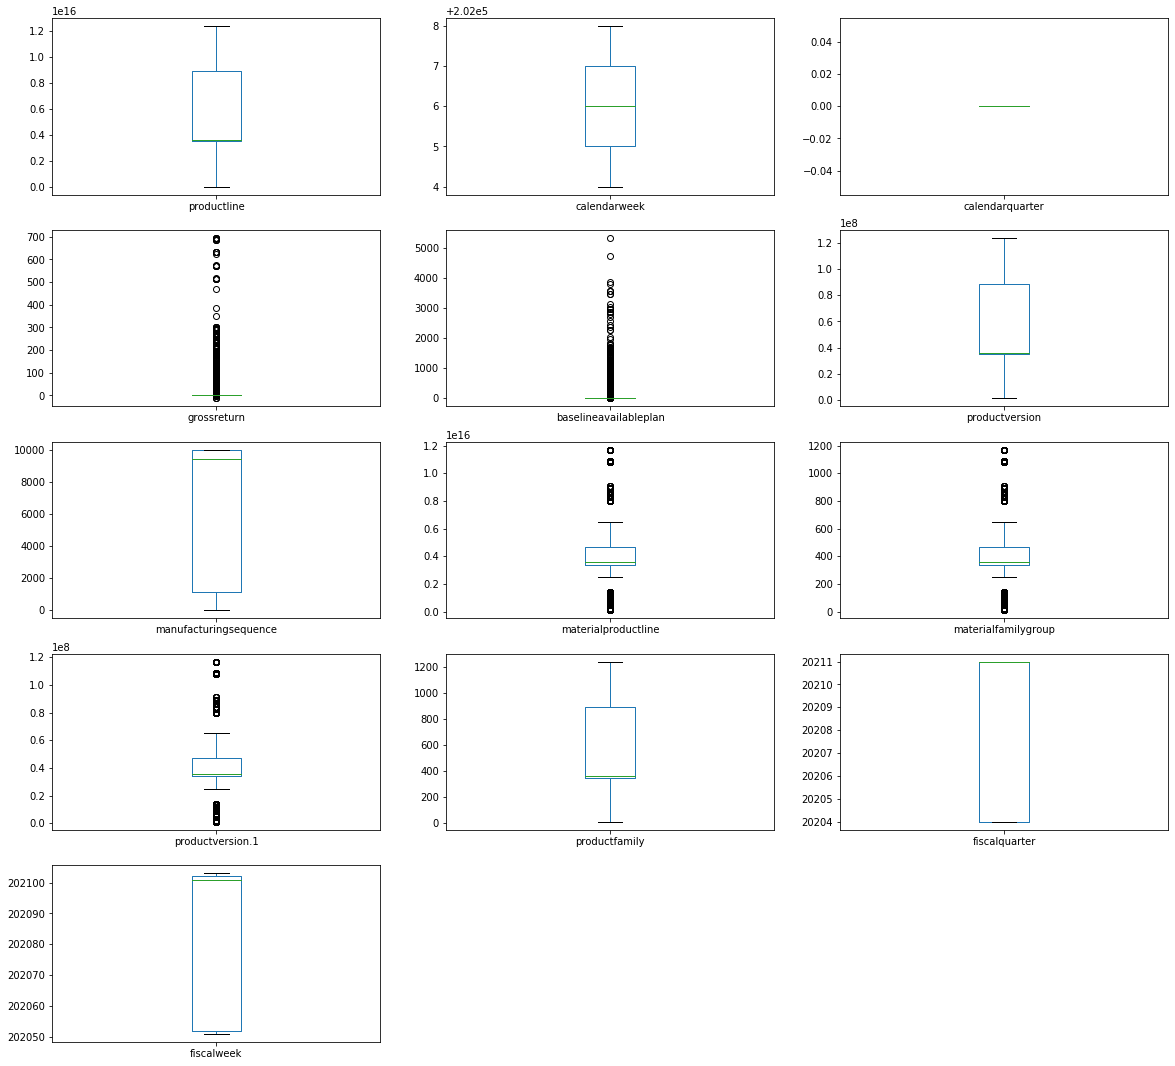

In [0]:
shopper.plot(kind='box', subplots=True, layout=(13,3), sharex=False, sharey=False,figsize=(20,50))
plt.show()

326753+20745=347498

In [0]:

# Scatterplot Matrix
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
plt.figure(figsize=(40,20))
scatter_matrix(shopper)
plt.show()

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/misc.py:81: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/misc.py:71: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


<Figure size 2880x1440 with 0 Axes>

KeyboardInterrupt: ignored

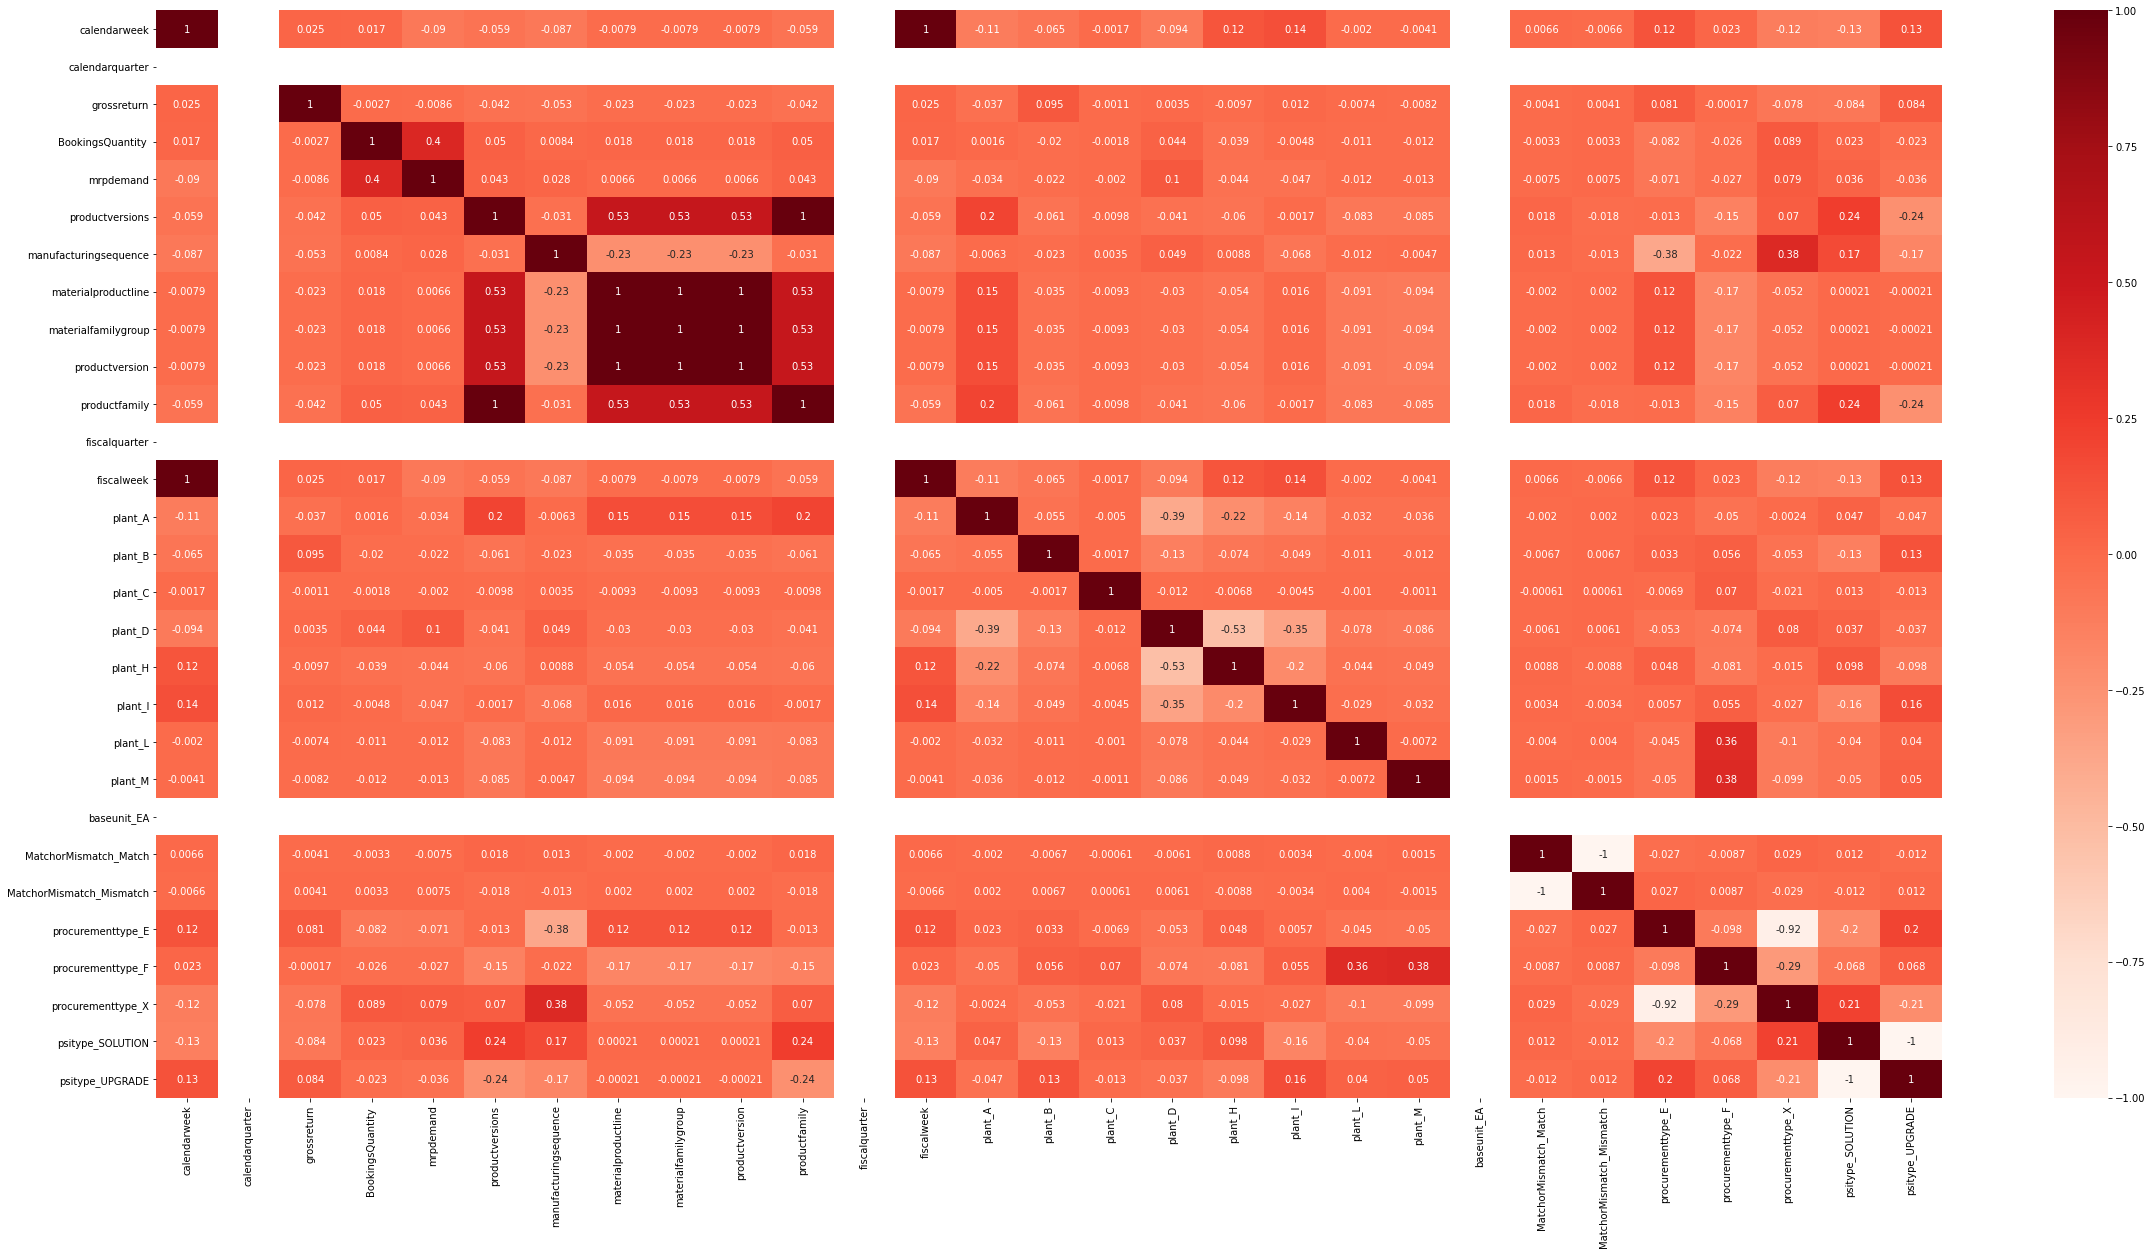

In [0]:

#creating a correlation matrix
plt.figure(figsize=(40,20))
cor = shopper2.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [0]:
shopper2 = pd.get_dummies(shopper, columns=['plant','baseunit','MatchorMismatch','procurementtype','psitype'])


In [0]:
shopper2

,UniqueID,materiallocation,productline,demandsource,region,backupdate,calendarweek,calendarquarter,grossreturn,Quantity,mrpdemand,partgroup,productid,productversions,manufacturingsequence,materialproductline,materialfamilygroup,producttype,materialtype,productversion,productfamily,fiscalquarter,fiscalweek,plant_A,plant_B,plant_C,plant_D,plant_H,plant_I,plant_L,plant_M,baseunit_EA,MatchorMismatch_Match,MatchorMismatch_Mismatch,procurementtype_E,procurementtype_F,procurementtype_X,psitype_SOLUTION,psitype_UPGRADE
0,A_003-0044-01_202101,003-0044-01,2.5e+15,RV,E1,4/3/2020 0:00,202006,0,0,0,1,CABLES POWER,POWER,25000220.0,9777.0,2.500000e+15,250.0,CABLES,ZSTK,25000030.0,250.0,20211,202101,1,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0
1,A_003-0045-01_202101,003-0044-01,2.5e+15,RV,D,4/3/2020 0:00,202006,0,0,0,1,CABLES POWER,POWER,25000030.0,9777.0,2.500000e+15,250.0,CABLES,ZSTK,25000030.0,250.0,20211,202101,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1
2,A_003-0048-01_202101,003-0045-01,2.5e+15,RV,E1,4/3/2020 0:00,202006,0,0,0,0,CABLES POWER,POWER,25000220.0,9777.0,2.500000e+15,250.0,CABLES,ZSTK,25000030.0,250.0,20211,202101,1,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0
3,A_003-0049-01_202101,003-0048-01,2.5e+15,DF,E1,4/3/2020 0:00,202006,0,0,0,104,CABLES POWER,POWER,25000030.0,9777.0,2.500000e+15,250.0,CABLES,ZSTK,25000030.0,250.0,20211,202101,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1
4,A_003-0050-01_202101,003-0048-01,2.5e+15,DF,D,4/3/2020 0:00,202006,0,0,0,104,CABLES POWER,POWER,25000030.0,9777.0,2.500000e+15,250.0,CABLES,ZSTK,25000030.0,250.0,20211,202101,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155279,M_106-652-004_202101,100-563-611,3.60E+15,CS,D,4/3/2020 0:00,202012,0,0,166,2691,MODULE FILLER IO,FILLER IO,36000100.0,306.0,4.700000e+15,470.0,MODULE,ZSTK,47000010.0,360.0,20211,202107,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0
155280,M_106-652-005_202101,100-563-611,3.60E+15,RV,D,4/3/2020 0:00,202012,0,0,166,2691,MODULE FILLER IO,FILLER IO,36000240.0,306.0,4.700000e+15,470.0,MODULE,ZSTK,47000010.0,360.0,20211,202107,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1
155281,M_106-652-011_202101,100-563-611,1.20E+15,RV,D,4/3/2020 0:00,202012,0,0,166,2691,MODULE FILLER IO,FILLER IO,12000080.0,306.0,4.700000e+15,470.0,MODULE,ZSTK,47000010.0,120.0,20211,202107,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1
155282,M_106-652-013_202101,100-563-611,1.20E+15,UP,C1,4/3/2020 0:00,202012,0,0,166,2691,MODULE FILLER IO,FILLER IO,12000030.0,306.0,4.700000e+15,470.0,MODULE,ZSTK,47000010.0,120.0,20211,202107,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0


In [0]:
shopper2= shopper.dropna()
x1 = pd.get_dummies(shopper2)


x1.columns

In [0]:
shopper1 = shopper.rename(columns = {"productversion.1":"productvs"}) 
  
shopper1

,plant,materiallocation,productline,demandsource,region,backupdate,calendarweek,calendarquarter,grossreturn,baseunit,baselineavailableplan,partgroup,productid,productversion,manufacturingsequence,materialproductline,materialfamilygroup,producttype,procurementtype,materialtype,productvs,productfamily,psitype,fiscalquarter,fiscalweek
0,A,002056300,700020000002840,NR,E1,2020-01-17 00:00:00,202008,0,0.0,EA,0.0,MISC,NaN,7000200.0,9999.0,7.000200e+14,70.0,MISC,X,ZSTK,7000200.0,70.0,UPGRADE,20211,202103
1,A,002056758,4700001000000010,DF,A1,2020-01-17 00:00:00,202008,0,0.0,EA,0.0,MISC MECH,MECH,47000010.0,9999.0,4.700001e+15,470.0,MISC,X,ZSTK,47000010.0,470.0,UPGRADE,20211,202103
2,A,003-0010-02,2500022000000080,RV,E1,2020-01-17 00:00:00,202008,0,0.0,EA,0.0,CABLES POWER,POWER,25000220.0,9777.0,2.500003e+15,250.0,CABLES,X,ZSTK,25000030.0,250.0,SOLUTION,20211,202103
3,A,003-0010-02,2500022000000070,RV,E1,2020-01-17 00:00:00,202008,0,0.0,EA,0.0,CABLES POWER,POWER,25000220.0,9777.0,2.500003e+15,250.0,CABLES,X,ZSTK,25000030.0,250.0,SOLUTION,20211,202103
4,A,003-0010-02,2500010000000140,RV,E1,2020-01-17 00:00:00,202008,0,0.0,EA,0.0,CABLES POWER,POWER,25000100.0,9777.0,2.500003e+15,250.0,CABLES,X,ZSTK,25000030.0,250.0,SOLUTION,20211,202103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347493,L,MDS-SFP-8GSW,900004000000130,RV,I,2020-01-17 00:00:00,202004,0,0.0,EA,0.0,NaN,NaN,9000040.0,0.0,9.000040e+14,90.0,NaN,F,ZMOD,9000040.0,90.0,SOLUTION,20204,202051
347494,L,PK-SFP10G-AC10M,900003000000020,RV,I,2020-01-17 00:00:00,202004,0,0.0,EA,0.0,CABLES,NaN,9000030.0,9777.0,9.000040e+14,90.0,CABLES,F,ZSTK,9000040.0,90.0,UPGRADE,20204,202051
347495,L,PK-SFP10G-C3M,900003000000020,RV,I,2020-01-17 00:00:00,202004,0,0.0,EA,0.0,CABLES,NaN,9000030.0,9777.0,9.000040e+14,90.0,CABLES,F,ZSTK,9000040.0,90.0,UPGRADE,20204,202051
347496,L,PK-SFP10G-C5M,900004000000130,RV,I,2020-01-17 00:00:00,202004,0,0.0,EA,0.0,CABLES,NaN,9000040.0,9777.0,9.000040e+14,90.0,CABLES,F,ZSTK,9000040.0,90.0,SOLUTION,20204,202051


In [0]:
shopper2= shopper1.dropna()
x1 = pd.get_dummies(shopper2)


x1.columns

Index(['productline', 'calendarweek', 'calendarquarter', 'grossreturn',
       'baselineavailableplan', 'productversion', 'manufacturingsequence',
       'materialproductline', 'materialfamilygroup', 'productvs',
       ...
       'producttype_TLA', 'producttype_TRANSCEIVER', 'producttype_UPS',
       'producttype_XPE', 'procurementtype_E', 'procurementtype_F',
       'procurementtype_X', 'materialtype_ZSTK', 'psitype_SOLUTION',
       'psitype_UPGRADE'],
      dtype='object', length=12560)

In [0]:
#for non numeric variables

df=x1

In [0]:
import pandas as pd
import numpy as np
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [0]:
shopper2.dropna()
df = shopper2._get_numeric_data()

In [0]:
df

,calendarweek,calendarquarter,grossreturn,BookingsQuantity,mrpdemand,productversions,manufacturingsequence,materialproductline,materialfamilygroup,productversion,productfamily,fiscalquarter,fiscalweek,plant_A,plant_B,plant_C,plant_D,plant_H,plant_I,plant_L,plant_M,baseunit_EA,MatchorMismatch_Match,MatchorMismatch_Mismatch,procurementtype_E,procurementtype_F,procurementtype_X,psitype_SOLUTION,psitype_UPGRADE
0,202006,0,0,0,1,25000220.0,9777.0,2.500000e+15,250.0,25000030.0,250.0,20211,202101,1,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0
1,202006,0,0,0,1,25000030.0,9777.0,2.500000e+15,250.0,25000030.0,250.0,20211,202101,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1
2,202006,0,0,0,0,25000220.0,9777.0,2.500000e+15,250.0,25000030.0,250.0,20211,202101,1,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0
3,202006,0,0,0,104,25000030.0,9777.0,2.500000e+15,250.0,25000030.0,250.0,20211,202101,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1
4,202006,0,0,0,104,25000030.0,9777.0,2.500000e+15,250.0,25000030.0,250.0,20211,202101,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155279,202012,0,0,166,2691,36000100.0,306.0,4.700000e+15,470.0,47000010.0,360.0,20211,202107,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0
155280,202012,0,0,166,2691,36000240.0,306.0,4.700000e+15,470.0,47000010.0,360.0,20211,202107,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1
155281,202012,0,0,166,2691,12000080.0,306.0,4.700000e+15,470.0,47000010.0,120.0,20211,202107,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1
155282,202012,0,0,166,2691,12000030.0,306.0,4.700000e+15,470.0,47000010.0,120.0,20211,202107,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0


In [0]:
x.head()

,productline,calendarweek,calendarquarter,grossreturn,baselineavailableplan,productversion,manufacturingsequence,materialproductline,materialfamilygroup,productvs,productfamily,fiscalquarter,fiscalweek,plant_A,plant_C,plant_D,plant_F,plant_H,plant_I,plant_J,plant_K,plant_L,plant_M,materiallocation_002056758,materiallocation_003-0010-02,materiallocation_003-0012-01,materiallocation_003-0041-01,materiallocation_003-0044-01,materiallocation_003-0045-01,materiallocation_003-0046-01,materiallocation_003-0048-01,materiallocation_003-0049-01,materiallocation_003-0050-01,materiallocation_003-0054-01,materiallocation_003-0080-01,materiallocation_003-0081-01,materiallocation_003-0082-01,materiallocation_003-0083-01,materiallocation_003-0087-01,materiallocation_003-0094-01,...,producttype_INST KIT FIX,producttype_ISILON,producttype_KVM,producttype_LCC,producttype_LV DR FC,producttype_LV DR SAS,producttype_LV DR SAS-FC,producttype_LV DR SATA,producttype_LV DR SSD,producttype_MEMORY,producttype_MISC,producttype_MODULE,producttype_MOTHERBOARD,producttype_NODE,producttype_OPTICS,producttype_PCB,producttype_PDP,producttype_POWER,producttype_RACK,producttype_RACK U,producttype_SERVER,producttype_SERVER DISK,producttype_SLIC,producttype_SP,producttype_SP/XPE/DAE,producttype_SPS,producttype_SUP CARD,producttype_SWITCH,producttype_THIRD PARTY,producttype_TIGON,producttype_TLA,producttype_TRANSCEIVER,producttype_UPS,producttype_XPE,procurementtype_E,procurementtype_F,procurementtype_X,materialtype_ZSTK,psitype_SOLUTION,psitype_UPGRADE
1,4700001000000010,202008,0,0.0,0.0,47000010.0,9999.0,4.700001e+15,470.0,47000010.0,470.0,20211,202103,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1
2,2500022000000080,202008,0,0.0,0.0,25000220.0,9777.0,2.500003e+15,250.0,25000030.0,250.0,20211,202103,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0
3,2500022000000070,202008,0,0.0,0.0,25000220.0,9777.0,2.500003e+15,250.0,25000030.0,250.0,20211,202103,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0
4,2500010000000140,202008,0,0.0,0.0,25000100.0,9777.0,2.500003e+15,250.0,25000030.0,250.0,20211,202103,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0
5,2500022000000100,202008,0,0.0,0.0,25000220.0,9777.0,2.500003e+15,250.0,25000030.0,250.0,20211,202103,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0


In [0]:
df = df['grossreturn','BookingsQuantity','mrpdemand','productversion','productfamily','fiscalquarter','fiscalweek','plant_A','plant_B','plant_C','plant_D','plant_H','plant_I','plant_L','plant_M','demandsource_CS','demandsource_DF','demandsource_DH','demandsource_DR','demandsource_EG','demandsource_GHE','demandsource_ID','demandsource_IN','demandsource_NR','demandsource_PH','demandsource_RV','demandsource_UP','region_A1','region_C1','region_D','region_E1','region_I','baseunit_EA','MatchorMismatch_Match','MatchorMismatch_Mismatch','procurementtype_E','procurementtype_F','procurementtype_X','psitype_SOLUTION','psitype_UPGRADE'].dropna()

KeyError: ignored

NameError: ignored

In [0]:
df.dtypes

calendarweek                  int64
calendarquarter               int64
grossreturn                   int64
BookingsQuantity              int64
mrpdemand                     int64
productversions             float64
manufacturingsequence       float64
materialproductline         float64
materialfamilygroup         float64
productversion              float64
productfamily               float64
fiscalquarter                 int64
fiscalweek                    int64
plant_A                       uint8
plant_B                       uint8
plant_C                       uint8
plant_D                       uint8
plant_H                       uint8
plant_I                       uint8
plant_L                       uint8
plant_M                       uint8
baseunit_EA                   uint8
MatchorMismatch_Match         uint8
MatchorMismatch_Mismatch      uint8
procurementtype_E             uint8
procurementtype_F             uint8
procurementtype_X             uint8
psitype_SOLUTION            

In [0]:
import sys
sys.getrecursionlimit 

<function sys.getrecursionlimit>

In [0]:
%%capture
#gather features
features = "+".join(df.columns.drop(['grossreturn']))

# get y and X dataframes based on this regression:
y, X = dmatrices('grossreturn ~' + features, df, return_type='dataframe')

PatsyError: ignored

In [0]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1636: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.6/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [0]:
vif.round(1)

,VIF Factor,features
0,0.000000e+00,Intercept
1,inf,productline
2,0.000000e+00,calendarweek
3,1.000000e+00,baselineavailableplan
4,inf,productversion
5,1.000000e+00,manufacturingsequence
6,inf,materialproductline
7,9.435940e+09,materialfamilygroup
8,inf,productvs
9,9.968369e+09,productfamily


In [0]:
shp2 = df
shp2

,productline,calendarweek,calendarquarter,grossreturn,baselineavailableplan,productversion,manufacturingsequence,materialproductline,materialfamilygroup,productvs,productfamily,fiscalquarter,fiscalweek,plant_A,plant_C,plant_D,plant_F,plant_H,plant_I,plant_J,plant_K,plant_L,plant_M,materiallocation_002056758,materiallocation_003-0010-02,materiallocation_003-0012-01,materiallocation_003-0041-01,materiallocation_003-0044-01,materiallocation_003-0045-01,materiallocation_003-0046-01,materiallocation_003-0048-01,materiallocation_003-0049-01,materiallocation_003-0050-01,materiallocation_003-0054-01,materiallocation_003-0080-01,materiallocation_003-0081-01,materiallocation_003-0082-01,materiallocation_003-0083-01,materiallocation_003-0087-01,materiallocation_003-0094-01,...,producttype_INST KIT FIX,producttype_ISILON,producttype_KVM,producttype_LCC,producttype_LV DR FC,producttype_LV DR SAS,producttype_LV DR SAS-FC,producttype_LV DR SATA,producttype_LV DR SSD,producttype_MEMORY,producttype_MISC,producttype_MODULE,producttype_MOTHERBOARD,producttype_NODE,producttype_OPTICS,producttype_PCB,producttype_PDP,producttype_POWER,producttype_RACK,producttype_RACK U,producttype_SERVER,producttype_SERVER DISK,producttype_SLIC,producttype_SP,producttype_SP/XPE/DAE,producttype_SPS,producttype_SUP CARD,producttype_SWITCH,producttype_THIRD PARTY,producttype_TIGON,producttype_TLA,producttype_TRANSCEIVER,producttype_UPS,producttype_XPE,procurementtype_E,procurementtype_F,procurementtype_X,materialtype_ZSTK,psitype_SOLUTION,psitype_UPGRADE
1,4700001000000010,202008,0,0.0,0.0,47000010.0,9999.0,4.700001e+15,470.0,47000010.0,470.0,20211,202103,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1
2,2500022000000080,202008,0,0.0,0.0,25000220.0,9777.0,2.500003e+15,250.0,25000030.0,250.0,20211,202103,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0
3,2500022000000070,202008,0,0.0,0.0,25000220.0,9777.0,2.500003e+15,250.0,25000030.0,250.0,20211,202103,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0
4,2500010000000140,202008,0,0.0,0.0,25000100.0,9777.0,2.500003e+15,250.0,25000030.0,250.0,20211,202103,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0
5,2500022000000100,202008,0,0.0,0.0,25000220.0,9777.0,2.500003e+15,250.0,25000030.0,250.0,20211,202103,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347476,900003000000020,202004,0,0.0,0.0,9000030.0,3951.0,9.000030e+14,90.0,9000030.0,90.0,20204,202051,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1
347477,3500059000000690,202004,0,0.0,0.0,35000590.0,3951.0,9.000030e+14,90.0,9000030.0,350.0,20204,202051,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1
347478,900004000000130,202004,0,0.0,0.0,9000040.0,3401.0,9.000030e+14,90.0,9000030.0,90.0,20204,202051,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0
347479,900004000000130,202004,0,0.0,0.0,9000040.0,3401.0,9.000030e+14,90.0,9000030.0,90.0,20204,202051,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [0]:
shp2['grossreturn'].value_counts()

0.0      273981
1.0        8676
2.0        2414
3.0        1270
4.0         944
          ...  
197.0         1
689.0         1
161.0         1
577.0         1
289.0         1
Name: grossreturn, Length: 209, dtype: int64

In [0]:
shp3 =shp2.where(shp2 < 1, other=1)

In [0]:
shp3

,productline,calendarweek,calendarquarter,grossreturn,baselineavailableplan,productversion,manufacturingsequence,materialproductline,materialfamilygroup,productvs,productfamily,fiscalquarter,fiscalweek,plant_A,plant_C,plant_D,plant_F,plant_H,plant_I,plant_J,plant_K,plant_L,plant_M,materiallocation_002056758,materiallocation_003-0010-02,materiallocation_003-0012-01,materiallocation_003-0041-01,materiallocation_003-0044-01,materiallocation_003-0045-01,materiallocation_003-0046-01,materiallocation_003-0048-01,materiallocation_003-0049-01,materiallocation_003-0050-01,materiallocation_003-0054-01,materiallocation_003-0080-01,materiallocation_003-0081-01,materiallocation_003-0082-01,materiallocation_003-0083-01,materiallocation_003-0087-01,materiallocation_003-0094-01,...,producttype_INST KIT FIX,producttype_ISILON,producttype_KVM,producttype_LCC,producttype_LV DR FC,producttype_LV DR SAS,producttype_LV DR SAS-FC,producttype_LV DR SATA,producttype_LV DR SSD,producttype_MEMORY,producttype_MISC,producttype_MODULE,producttype_MOTHERBOARD,producttype_NODE,producttype_OPTICS,producttype_PCB,producttype_PDP,producttype_POWER,producttype_RACK,producttype_RACK U,producttype_SERVER,producttype_SERVER DISK,producttype_SLIC,producttype_SP,producttype_SP/XPE/DAE,producttype_SPS,producttype_SUP CARD,producttype_SWITCH,producttype_THIRD PARTY,producttype_TIGON,producttype_TLA,producttype_TRANSCEIVER,producttype_UPS,producttype_XPE,procurementtype_E,procurementtype_F,procurementtype_X,materialtype_ZSTK,psitype_SOLUTION,psitype_UPGRADE
1,1,1,0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1
2,1,1,0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0
3,1,1,0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0
4,1,1,0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0
5,1,1,0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347476,1,1,0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1
347477,1,1,0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1
347478,1,1,0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0
347479,1,1,0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1


In [0]:
shp3['grossreturn'].value_counts()

 0.0     273981
 1.0      18228
-1.0          3
-13.0         2
-11.0         1
Name: grossreturn, dtype: int64

In [0]:
shp2['grossret'] = shp3['grossreturn']
shp2

,productline,calendarweek,calendarquarter,grossreturn,baselineavailableplan,productversion,manufacturingsequence,materialproductline,materialfamilygroup,productvs,productfamily,fiscalquarter,fiscalweek,plant_A,plant_C,plant_D,plant_F,plant_H,plant_I,plant_J,plant_K,plant_L,plant_M,materiallocation_002056758,materiallocation_003-0010-02,materiallocation_003-0012-01,materiallocation_003-0041-01,materiallocation_003-0044-01,materiallocation_003-0045-01,materiallocation_003-0046-01,materiallocation_003-0048-01,materiallocation_003-0049-01,materiallocation_003-0050-01,materiallocation_003-0054-01,materiallocation_003-0080-01,materiallocation_003-0081-01,materiallocation_003-0082-01,materiallocation_003-0083-01,materiallocation_003-0087-01,materiallocation_003-0094-01,...,producttype_ISILON,producttype_KVM,producttype_LCC,producttype_LV DR FC,producttype_LV DR SAS,producttype_LV DR SAS-FC,producttype_LV DR SATA,producttype_LV DR SSD,producttype_MEMORY,producttype_MISC,producttype_MODULE,producttype_MOTHERBOARD,producttype_NODE,producttype_OPTICS,producttype_PCB,producttype_PDP,producttype_POWER,producttype_RACK,producttype_RACK U,producttype_SERVER,producttype_SERVER DISK,producttype_SLIC,producttype_SP,producttype_SP/XPE/DAE,producttype_SPS,producttype_SUP CARD,producttype_SWITCH,producttype_THIRD PARTY,producttype_TIGON,producttype_TLA,producttype_TRANSCEIVER,producttype_UPS,producttype_XPE,procurementtype_E,procurementtype_F,procurementtype_X,materialtype_ZSTK,psitype_SOLUTION,psitype_UPGRADE,grossret
1,4700001000000010,202008,0,0.0,0.0,47000010.0,9999.0,4.700001e+15,470.0,47000010.0,470.0,20211,202103,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0.0
2,2500022000000080,202008,0,0.0,0.0,25000220.0,9777.0,2.500003e+15,250.0,25000030.0,250.0,20211,202103,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0.0
3,2500022000000070,202008,0,0.0,0.0,25000220.0,9777.0,2.500003e+15,250.0,25000030.0,250.0,20211,202103,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0.0
4,2500010000000140,202008,0,0.0,0.0,25000100.0,9777.0,2.500003e+15,250.0,25000030.0,250.0,20211,202103,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0.0
5,2500022000000100,202008,0,0.0,0.0,25000220.0,9777.0,2.500003e+15,250.0,25000030.0,250.0,20211,202103,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347476,900003000000020,202004,0,0.0,0.0,9000030.0,3951.0,9.000030e+14,90.0,9000030.0,90.0,20204,202051,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0.0
347477,3500059000000690,202004,0,0.0,0.0,35000590.0,3951.0,9.000030e+14,90.0,9000030.0,350.0,20204,202051,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0.0
347478,900004000000130,202004,0,0.0,0.0,9000040.0,3401.0,9.000030e+14,90.0,9000030.0,90.0,20204,202051,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0.0
347479,900004000000130,202004,0,0.0,0.0,9000040.0,3401.0,9.000030e+14,90.0,9000030.0,90.0,20204,202051,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [0]:
shp2['grossret'].value_counts()

 0.0     273981
 1.0      18228
-1.0          3
-13.0         2
-11.0         1
Name: grossret, dtype: int64

In [0]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = shp2[shp2.grossret==0]
df_minority = shp2[shp2.grossret==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=173749,    # to match majority class
                                 random_state=123) # reproducible results
df_majority_upsampled = resample(df_majority, 
                                 replace=True,     # sample with replacement
                                 n_samples=173749,    # to match majority class
                                 random_state=123)
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority_upsampled, df_minority_upsampled])
 
# Display new class counts
df_upsampled.grossret.value_counts()
# 1    576
# 0    576
# Name: balance, dtype: int64

1.0    173749
0.0    173749
Name: grossret, dtype: int64

In [0]:
df_upsampled

,productline,calendarweek,calendarquarter,grossreturn,baselineavailableplan,productversion,manufacturingsequence,materialproductline,materialfamilygroup,productvs,productfamily,fiscalquarter,fiscalweek,plant_A,plant_C,plant_D,plant_F,plant_H,plant_I,plant_J,plant_K,plant_L,plant_M,materiallocation_002056758,materiallocation_003-0010-02,materiallocation_003-0012-01,materiallocation_003-0041-01,materiallocation_003-0044-01,materiallocation_003-0045-01,materiallocation_003-0046-01,materiallocation_003-0048-01,materiallocation_003-0049-01,materiallocation_003-0050-01,materiallocation_003-0054-01,materiallocation_003-0080-01,materiallocation_003-0081-01,materiallocation_003-0082-01,materiallocation_003-0083-01,materiallocation_003-0087-01,materiallocation_003-0094-01,...,producttype_ISILON,producttype_KVM,producttype_LCC,producttype_LV DR FC,producttype_LV DR SAS,producttype_LV DR SAS-FC,producttype_LV DR SATA,producttype_LV DR SSD,producttype_MEMORY,producttype_MISC,producttype_MODULE,producttype_MOTHERBOARD,producttype_NODE,producttype_OPTICS,producttype_PCB,producttype_PDP,producttype_POWER,producttype_RACK,producttype_RACK U,producttype_SERVER,producttype_SERVER DISK,producttype_SLIC,producttype_SP,producttype_SP/XPE/DAE,producttype_SPS,producttype_SUP CARD,producttype_SWITCH,producttype_THIRD PARTY,producttype_TIGON,producttype_TLA,producttype_TRANSCEIVER,producttype_UPS,producttype_XPE,procurementtype_E,procurementtype_F,procurementtype_X,materialtype_ZSTK,psitype_SOLUTION,psitype_UPGRADE,grossret
315755,3500101000000080,202004,0,0.0,0.0,35001010.0,1398.0,4.600001e+15,460.0,46000010.0,350.0,20204,202051,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0.0
33902,3500101000000020,202008,0,0.0,1.0,35001010.0,1101.0,8.900002e+15,890.0,89000020.0,350.0,20211,202103,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0.0
21386,3500101000000080,202008,0,0.0,0.0,35001010.0,9999.0,3.600006e+15,360.0,36000060.0,350.0,20211,202103,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0.0
243593,2500022000000100,202005,0,0.0,1.0,25000220.0,5200.0,2.500003e+15,250.0,25000030.0,250.0,20204,202052,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0.0
246819,3500068000000010,202005,0,0.0,0.0,35000680.0,1300.0,3.500068e+15,350.0,35000680.0,350.0,20204,202052,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120621,3600008000000045,202007,0,1.0,0.0,36000080.0,9111.0,7.000100e+14,70.0,7000100.0,360.0,20211,202102,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1.0
120884,3600008000000045,202007,0,9.0,0.0,36000080.0,1304.0,3.600024e+15,360.0,36000240.0,360.0,20211,202102,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1.0
322210,3500101000000080,202004,0,1.0,0.0,35001010.0,9999.0,5.900001e+15,590.0,59000010.0,350.0,20204,202051,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1.0
173749,3500101000000080,202006,0,1.0,0.0,35001010.0,5200.0,2.500003e+15,250.0,25000030.0,350.0,20211,202101,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,

In [0]:
df_upsampled['grossreturn'].value_counts()

0.0      173261
1.0       82553
2.0       22623
3.0       12244
4.0        8912
          ...  
689.0         5
241.0         5
626.0         5
248.0         5
195.0         2
Name: grossreturn, Length: 206, dtype: int64

In [0]:
 shopper1 = df_upsampled.drop(df_upsampled[['grossreturn']], axis=1)
 shopper1

,productline,calendarweek,calendarquarter,baselineavailableplan,productversion,manufacturingsequence,materialproductline,materialfamilygroup,productvs,productfamily,fiscalquarter,fiscalweek,plant_A,plant_C,plant_D,plant_F,plant_H,plant_I,plant_J,plant_K,plant_L,plant_M,materiallocation_002056758,materiallocation_003-0010-02,materiallocation_003-0012-01,materiallocation_003-0041-01,materiallocation_003-0044-01,materiallocation_003-0045-01,materiallocation_003-0046-01,materiallocation_003-0048-01,materiallocation_003-0049-01,materiallocation_003-0050-01,materiallocation_003-0054-01,materiallocation_003-0080-01,materiallocation_003-0081-01,materiallocation_003-0082-01,materiallocation_003-0083-01,materiallocation_003-0087-01,materiallocation_003-0094-01,materiallocation_003-0097-01,...,producttype_ISILON,producttype_KVM,producttype_LCC,producttype_LV DR FC,producttype_LV DR SAS,producttype_LV DR SAS-FC,producttype_LV DR SATA,producttype_LV DR SSD,producttype_MEMORY,producttype_MISC,producttype_MODULE,producttype_MOTHERBOARD,producttype_NODE,producttype_OPTICS,producttype_PCB,producttype_PDP,producttype_POWER,producttype_RACK,producttype_RACK U,producttype_SERVER,producttype_SERVER DISK,producttype_SLIC,producttype_SP,producttype_SP/XPE/DAE,producttype_SPS,producttype_SUP CARD,producttype_SWITCH,producttype_THIRD PARTY,producttype_TIGON,producttype_TLA,producttype_TRANSCEIVER,producttype_UPS,producttype_XPE,procurementtype_E,procurementtype_F,procurementtype_X,materialtype_ZSTK,psitype_SOLUTION,psitype_UPGRADE,grossret
315755,3500101000000080,202004,0,0.0,35001010.0,1398.0,4.600001e+15,460.0,46000010.0,350.0,20204,202051,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0.0
33902,3500101000000020,202008,0,1.0,35001010.0,1101.0,8.900002e+15,890.0,89000020.0,350.0,20211,202103,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0.0
21386,3500101000000080,202008,0,0.0,35001010.0,9999.0,3.600006e+15,360.0,36000060.0,350.0,20211,202103,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0.0
243593,2500022000000100,202005,0,1.0,25000220.0,5200.0,2.500003e+15,250.0,25000030.0,250.0,20204,202052,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0.0
246819,3500068000000010,202005,0,0.0,35000680.0,1300.0,3.500068e+15,350.0,35000680.0,350.0,20204,202052,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120621,3600008000000045,202007,0,0.0,36000080.0,9111.0,7.000100e+14,70.0,7000100.0,360.0,20211,202102,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1.0
120884,3600008000000045,202007,0,0.0,36000080.0,1304.0,3.600024e+15,360.0,36000240.0,360.0,20211,202102,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1.0
322210,3500101000000080,202004,0,0.0,35001010.0,9999.0,5.900001e+15,590.0,59000010.0,350.0,20204,202051,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1.0
173749,3500101000000080,202006,0,0.0,35001010.0,5200.0,2.500003e+15,250.0,25000030.0,350.0,20211,202101,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0

In [0]:
shoppery = df_upsampled['grossreturn']
shoppery

315755    0.0
33902     0.0
21386     0.0
243593    0.0
246819    0.0
         ... 
120621    1.0
120884    9.0
322210    1.0
173749    1.0
149889    1.0
Name: grossreturn, Length: 347498, dtype: float64

In [0]:
# one hot encoding 

x = pd.get_dummies(shopper1)

x.columns

In [0]:
>>> from collections import Counter
>>> from sklearn.datasets import make_classification
>>> X, y = make_classification(n_samples=5000, n_features=2, n_informative=2,
...                            n_redundant=0, n_repeated=0, n_classes=3,
...                            n_clusters_per_class=1,
...                            weights=[0.01, 0.05, 0.94],
...                            class_sep=0.8, random_state=0)
>>> print(sorted(Counter(y).items()))
[(0, 64), (1, 262), (2, 4674)]
>>> from imblearn.under_sampling import ClusterCentroids
>>> cc = ClusterCentroids(random_state=0)
>>> X_resampled, y_resampled = cc.fit_resample(X, y)
>>> print(sorted(Counter(y_resampled).items()))

[(0, 64), (1, 262), (2, 4674)]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[(0, 64), (1, 64), (2, 64)]


In [0]:
x=x1

In [0]:
# label encoding of revenue

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(shopper)
y

ValueError: ignored

In [0]:
print(y.shape)
print(x.shape)

(5000,)
(292215, 12561)


In [0]:
y

array([2, 2, 2, ..., 2, 2, 2])

In [0]:
# splitting the data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

# checking the shapes

print("Shape of x_train :", x_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_test :", y_test.shape)

ValueError: ignored

In [0]:
# standard scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [0]:
# feature extraction

from sklearn.decomposition import PCA

pca = PCA(n_components = None)

x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [0]:
# MODELLING

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
# cross validation

from sklearn.model_selection import cross_val_score

cvs = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 10)

print("Mean Accuracy :", cvs.mean())
print("Mean Standard Deviation :", cvs.std())

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Maximum predicted probability", y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

Mean Accuracy : 0.8146535317835086
Mean Standard Deviation : 0.019574618959621013
[[490  92]
 [118 445]]
Maximum predicted probability [1 1 1 ... 0 0 0]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# cross validation

from sklearn.model_selection import cross_val_score

cvs = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 10)

print("Mean Accuracy :", cvs.mean())
print("Mean Standard Deviation :", cvs.std())


# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
# evaluating the model
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Mean Accuracy : 0.8187776375367397
Mean Standard Deviation : 0.023969663315583003
[[492  90]
 [111 452]]
Training Accuracy : 0.9955073006364658
Testing Accuracy : 0.8244541484716157
[[492  90]
 [111 452]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       582
           1       0.83      0.80      0.82       563

   micro avg       0.82      0.82      0.82      1145
   macro avg       0.82      0.82      0.82      1145
weighted avg       0.82      0.82      0.82      1145



In [0]:
# MODELLING

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# cross validation

from sklearn.model_selection import cross_val_score

cvs = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 10)

print("Mean Accuracy :", cvs.mean())
print("Mean Standard Deviation :", cvs.std())
# evaluating the model
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

Mean Accuracy : 0.7742232488818895
Mean Standard Deviation : 0.022093911134135127
Training Accuracy : 1.0
Testing Accuracy : 0.7589519650655022
[[434 148]
 [128 435]]
              precision    recall  f1-score   support

           0       0.77      0.75      0.76       582
           1       0.75      0.77      0.76       563

   micro avg       0.76      0.76      0.76      1145
   macro avg       0.76      0.76      0.76      1145
weighted avg       0.76      0.76      0.76      1145



In [0]:
# MODELLING

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model = SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
# cross validation

from sklearn.model_selection import cross_val_score

cvs = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 10)

print("Mean Accuracy :", cvs.mean())
print("Mean Standard Deviation :", cvs.std())


# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
# evaluating the model
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default 

Mean Accuracy : 0.821799204955202
Mean Standard Deviation : 0.019174257872000174
[[484  98]
 [ 92 471]]
Training Accuracy : 0.8667165855484837
Testing Accuracy : 0.834061135371179
[[484  98]
 [ 92 471]]
              precision    recall  f1-score   support

           0       0.84      0.83      0.84       582
           1       0.83      0.84      0.83       563

   micro avg       0.83      0.83      0.83      1145
   macro avg       0.83      0.83      0.83      1145
weighted avg       0.83      0.83      0.83      1145

